In [1]:
from ipynb.fs.full.FXpricelist import full_df
import pandas as pd
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

df = full_df(10)
df_signs = np.sign(df.diff(1)).mean(axis=1).rolling(20).mean()
df_index = (df / df.iloc[-1] * 100).mean(axis=1)

[*********************100%***********************]  25 of 25 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:label='1bffd1c5-b347-46f9-aa76-c5f2de7cb924', xlabel='Date'>

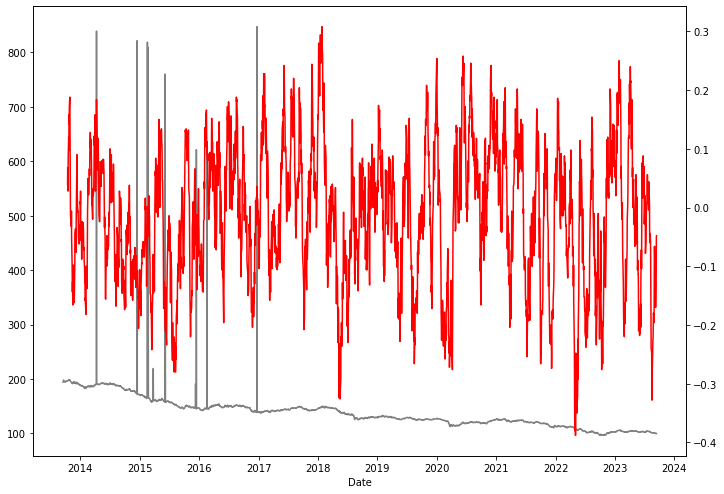

In [2]:
sns.lineplot(data=df_index, color="grey")
ax2 = plt.twinx()
sns.lineplot(data=df_signs, color="red", ax=ax2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date', ylabel='index'>

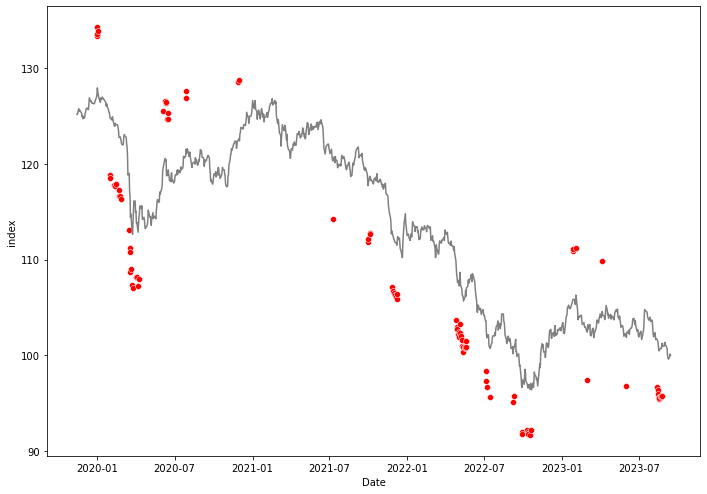

In [3]:
dff = pd.DataFrame(zip(df_index,df_signs),columns=["index","signs"],index=df_index.index)
s_mean = dff["signs"].mean()
s_std = dff["signs"].std()
s_lim = s_mean + s_std * 2
s_lim

dff["signals"] = np.where(dff["signs"] > s_lim,
                          dff["index"] * 1.05,
                          np.where(dff["signs"] < -s_lim, dff["index"] * 0.95, np.nan))

dffz = dff.iloc[-1000:]
sns.lineplot(data=dffz["index"], color="grey")
sns.scatterplot(y=dffz["signals"],x=dffz.index, color="red")

<AxesSubplot:xlabel='Date'>

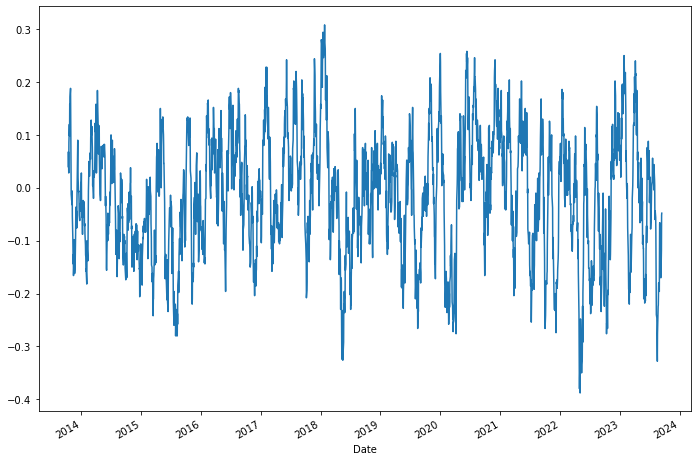

In [4]:
dff["signs"].plot()

In [5]:
df_index = (df[df.columns != "CNY"] / df[df.columns != "CNY"].iloc[-1] * 100).mean(axis=1)

ValueError: Item wrong length 25 instead of 2607.

In [ ]:
df_excny = df.loc[:,~df.columns.isin(["CNY"])]
df_excny_index = (df_excny / df_excny.iloc[-1] * 100).mean(axis=1)
df_cny = df.loc[:,df.columns.isin(["CNY"])]
df_cny_index = (df_cny / df_cny.iloc[-1] * 100)


df_excny_index

In [ ]:
df_cny_index["nonCNY"] = df_excny_index

df_af = df_cny_index["CNY"] / df_cny_index["nonCNY"]
df_af.plot()